# カリフォルニア住宅価格データセット
- さまざまな項目からブロック内の**住宅価格の中央値**を予想する
    - MedInc 所得中央値
    - HouseAge 平均築年数
    - AveRooms 平均部屋数
    - AveBedrms 平均ベッドルーム数
    - Population 人口
    - AveOccup 平均世帯人数
    - Latitude 緯度
    - Longitude 軽度




In [36]:
# データセットの取得
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X,y  = housing.data, housing.target

内容を確認しやすくするために、Pandas のDataframeに変換する

In [47]:
import pandas as pd
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


位置情報が、Longitude, Latitudeに入っているので、X,Y軸上にプロットして確認してみる

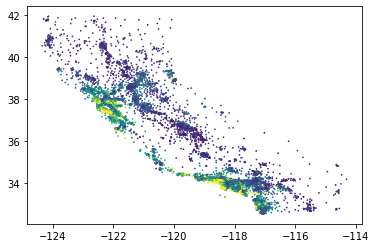

In [63]:
import matplotlib.pyplot as plt
plt.scatter(df['Longitude'], df['Latitude'], c=housing.target, s=0.5)

各特徴量と、目標変数の関係をプロットしてみる

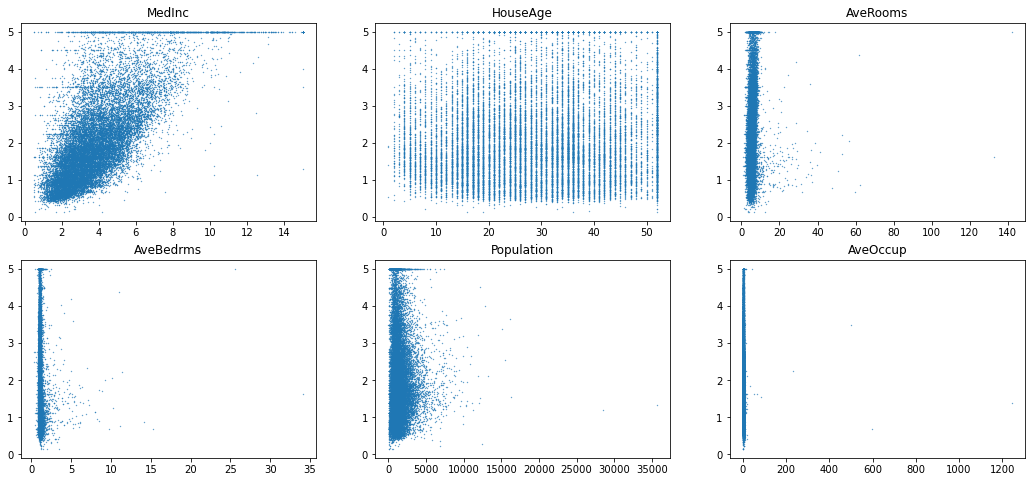

In [61]:
labels = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
_, axes = plt.subplots(2, 3, figsize=(18, 8))
for index, label in enumerate(labels):
    axes[index//3, index % 3].scatter(df[label], housing.target, s=0.1)
    axes[index//3, index % 3].set_title(label)

- 目標変数に天井がある
- Ageとはほとんど相関がない
- AveRooms, AveBedrms, Population, AveOccup は極端な外れ値があり、傾向が見通せない

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [15]:
# 訓連セットとテストセットへの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.preprocessing import StandardScaler

# 標準化スケール変換
ss = StandardScaler()
ss.fit(X_train)
X_train_t = ss.transform(X_train)
X_test_t = ss.transform(X_test)

In [16]:
# 線形回帰
mdl = LinearRegression().fit(X_train_t, y_train)
print("訓練スコア", mdl.score(X_train_t, y_train))
print("テストスコア", mdl.score(X_test_t, y_test))

訓練スコア 0.6102859678113064
テストスコア 0.59298692857601


In [35]:
from sklearn.preprocessing import PolynomialFeatures
pp = PolynomialFeatures(4)
X_train_p = pp.fit_transform(X_train)
X_test_p = pp.fit_transform(X_test)
ss = StandardScaler()
ss.fit(X_train_p)
X_train_p = ss.transform(X_train_p)
X_test_p = ss.transform(X_test_p)

#mdl = LinearRegression().fit(X_train_p, y_train)
mdl = Ridge(alpha=10.0).fit(X_train_p, y_train)
#mdl = Lasso().fit(X_train_p, y_train)
print("訓練スコア", mdl.score(X_train_p, y_train))
print("テストスコア", mdl.score(X_test_p, y_test))

訓練スコア 0.7107256710185204
テストスコア 0.6779134851084313


In [13]:
mdl = Ridge(alpha=1.0).fit(X_train, y_train)
print("訓練スコア", mdl.score(X_train, y_train))
print("テストスコア", mdl.score(X_test, y_test))


訓練スコア 0.609615829153506
テストスコア 0.5929075383506412


In [11]:
mdl = Lasso().fit(X_train, y_train)
print("訓練スコア", mdl.score(X_train, y_train))
print("テストスコア", mdl.score(X_test, y_test))

訓練スコア 0.0
テストスコア -0.0010175243170345016


In [36]:
from sklearn.tree import DecisionTreeRegressor

for max_depth in range(2, 15):
    mdl = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    print("{}\ttrain: {}\ttest: {}".format(max_depth, mdl.score(X_train, y_train), mdl.score(X_test, y_test)))


2	train: 0.4476762800567027	test: 0.4402888155161535
3	train: 0.5369734207973751	test: 0.5159577576963043
4	train: 0.587096279828152	test: 0.5671365525573329
5	train: 0.6400092316603436	test: 0.6140595840918428
6	train: 0.6878557970200256	test: 0.6486166438088263
7	train: 0.7270116809292556	test: 0.676460532598538
8	train: 0.7727933187019169	test: 0.6903889618782366
9	train: 0.8116979133551927	test: 0.7059451750558865
10	train: 0.8448027053913012	test: 0.6888636431339225
11	train: 0.8757604962296521	test: 0.6768157400327564
12	train: 0.9022152513931876	test: 0.6595698003602006
13	train: 0.9272956900092948	test: 0.6611120089209137
14	train: 0.9479729729930784	test: 0.6323467437884467


In [17]:
from sklearn.ensemble import RandomForestRegressor

mdl = RandomForestRegressor().fit(X_train, y_train)
print("train: {}\ttest: {}".format(mdl.score(X_train, y_train), mdl.score(X_test, y_test)))



train: 0.9732795541975273	test: 0.8018950106807113
